In [52]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [53]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [54]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [55]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

In [56]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [57]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [58]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [59]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2021-12-31   43.5066  43.7020  43.2729  43.4782  2.481868e+07  58.0952   
2021-12-30   43.7315  44.0693  43.4683  43.5164  2.440755e+07  58.2773   
2021-12-29   43.8297  44.0929  43.5851  43.6147  2.588387e+07  58.4604   
2021-12-28   43.4585  44.0545  43.4123  43.6834  3.325596e+07  58.1050   
2021-12-27   43.5361  43.8002  43.3013  43.6245  3.467728e+07  58.0658   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2021-12-31   58.4114  57.7966  58.0560  1.280199e+07  ...  95.3740  95.8371   
2021-12-30   58.7100  58.0560  58.0952  1.183803e+07  ...  95.4996  96.5719   
2021-12-29   58.6228  57.9405  58.2010  1.381803e+07  ...  96.6494  97.0890   
2021-12-28   58.9606  57.9748  58.2773  1.321088e+07  ...  97.1763  97.5657   
2021-12-27   58.5856  57.6811  58.3057  1.460949e+07  ...  96.3305  97.1086   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2021-12-31   94.1613  94.8236  5.305140e+06  46.9277  47.2504  46.7422   
2021-12-30   95.3642  95.4417  3.690382e+06  47.3777  47.7823  46.9376   
2021-12-29   95.3348  95.3740  7.166735e+06  47.4853  47.7350  47.2602   
2021-12-28   96.1951  96.5719  4.420555e+06  47.4458  48.0626  47.2504   
2021-12-27   95.7409  96.9918  4.343852e+06  47.4359  47.6954  46.9770   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2021-12-31   46.8794  1.294633e+07  
2021-12-30   46.9968  1.402305e+07  
2021-12-29   47.3382  1.472863e+07  
2021-12-28   47.3096  1.466287e+07  
2021-12-27   47.6510  1.217987e+07  

[5 rows x 30 columns]

In [60]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     47.0429
C       75.6568
GS     410.7930
JPM    166.5240
MS     101.1700
WFC     57.0701
dtype: float64

In [61]:
returns = pd.DataFrame()

In [62]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-30,0.000879,0.000675,0.007757,0.000827,0.006518,0.002504
2021-12-29,0.002259,0.001821,0.001773,0.000514,-0.000709,0.007264
2021-12-28,0.001575,0.001311,0.003646,0.000449,0.012560,-0.000604
2021-12-27,-0.001348,0.000487,0.001117,-0.003004,0.004348,0.007216


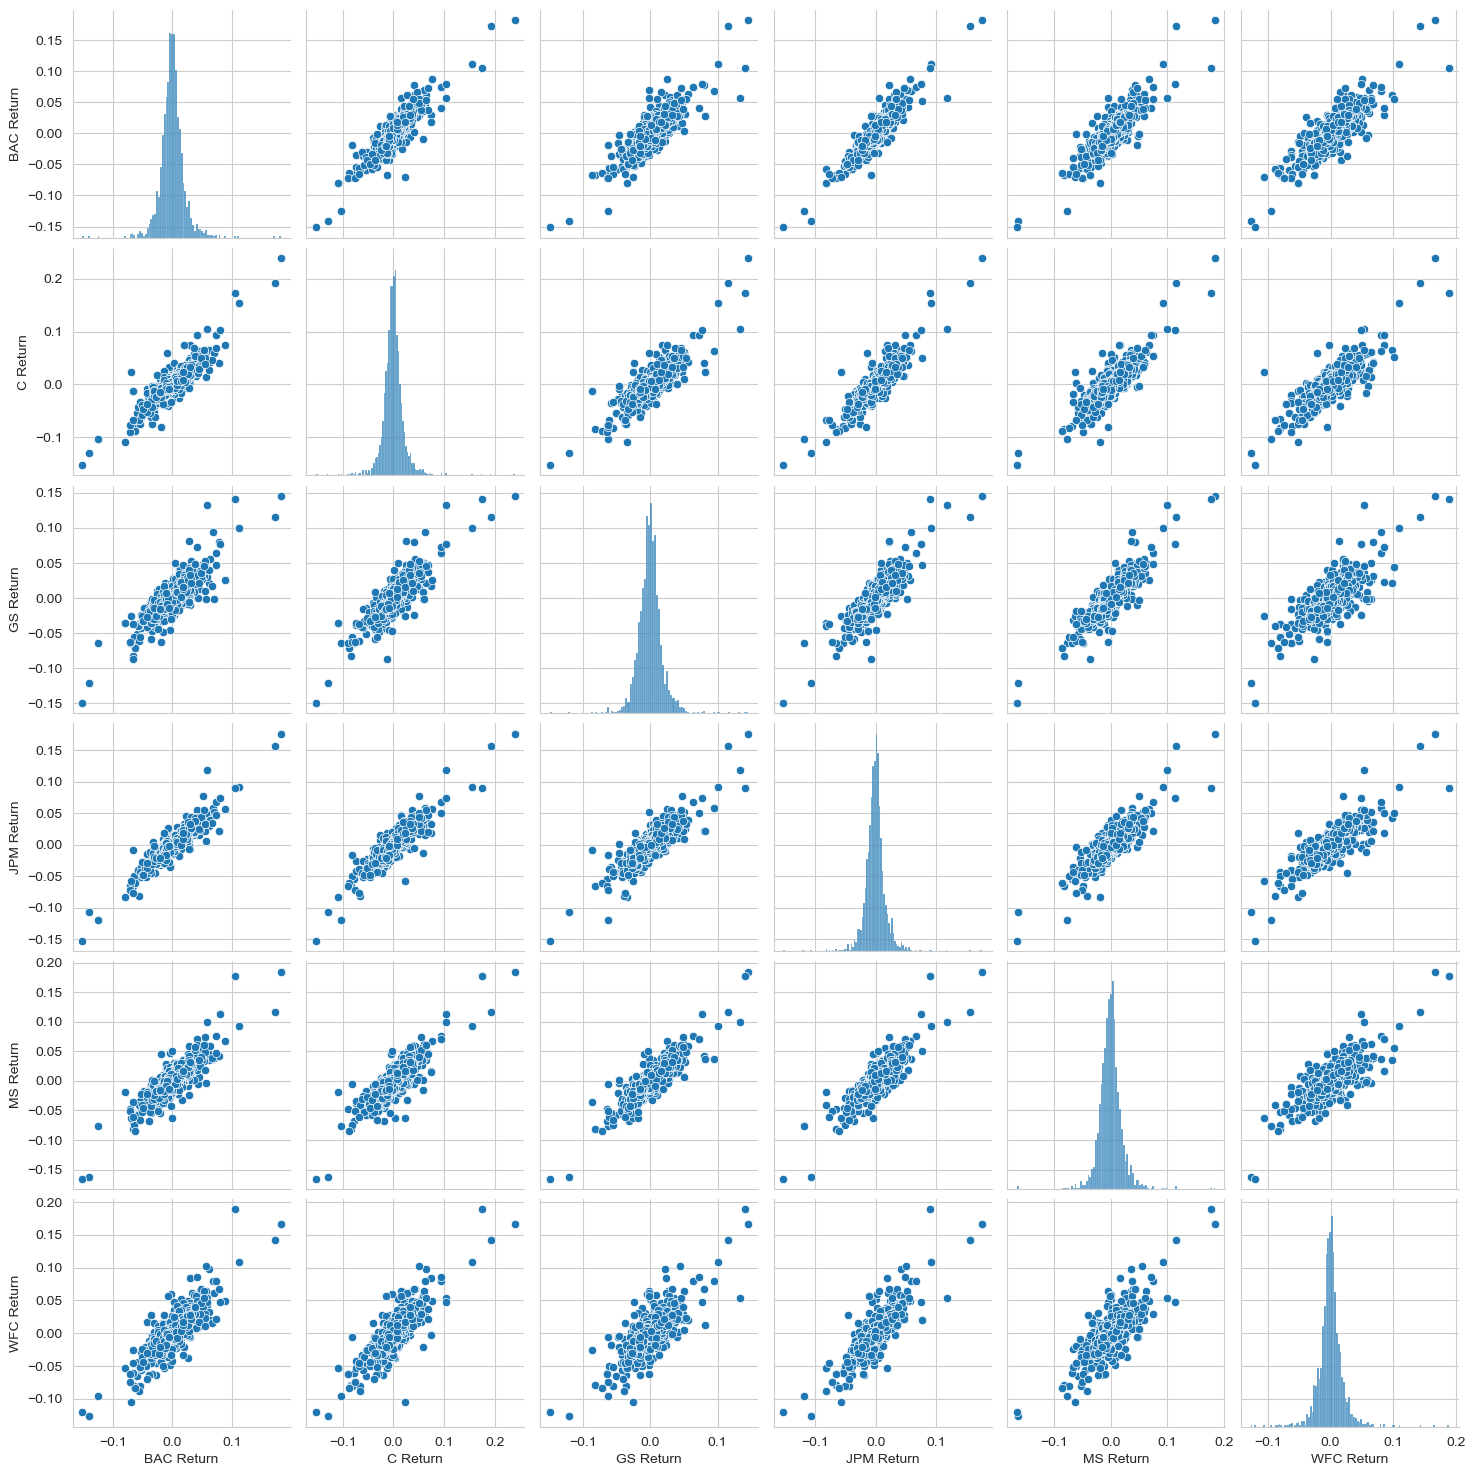

In [63]:
import seaborn as sns
sns.pairplot(returns[1:])

In [64]:
returns.idxmin()

BAC Return   2020-03-12
C Return     2020-03-12
GS Return    2020-03-12
JPM Return   2020-03-12
MS Return    2020-03-12
WFC Return   2020-03-23
dtype: datetime64[ns]

In [65]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-11
dtype: datetime64[ns]

In [66]:
returns.std()

BAC Return    0.020507
C Return      0.021994
GS Return     0.018802
JPM Return    0.017849
MS Return     0.020507
WFC Return    0.020242
dtype: float64

In [67]:
returns.sort_index().loc['2019-01-01':'2019-12-31'].std()

BAC Return    0.014543
C Return      0.015312
GS Return     0.014675
JPM Return    0.011713
MS Return     0.014717
WFC Return    0.012449
dtype: float64

<AxesSubplot:xlabel='C Return', ylabel='Count'>

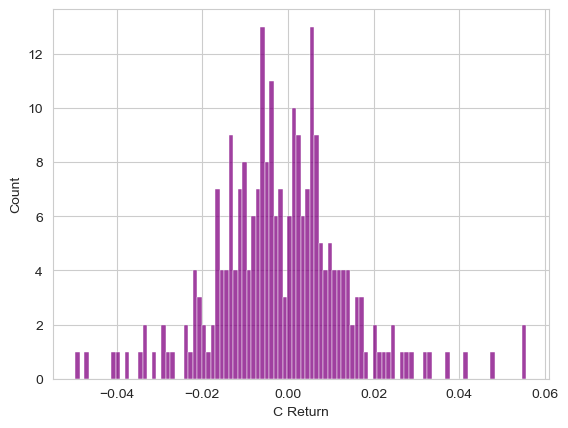

In [68]:
sns.histplot(returns.sort_index().loc['2019-01-01':'2019-12-31']['C Return'],color='purple',bins=100)

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

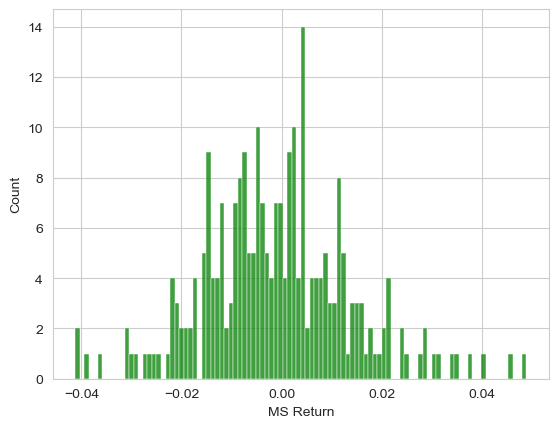

In [69]:
sns.histplot(returns.sort_index().loc['2019-01-01':'2019-12-31']['MS Return'],color='green',bins=100)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

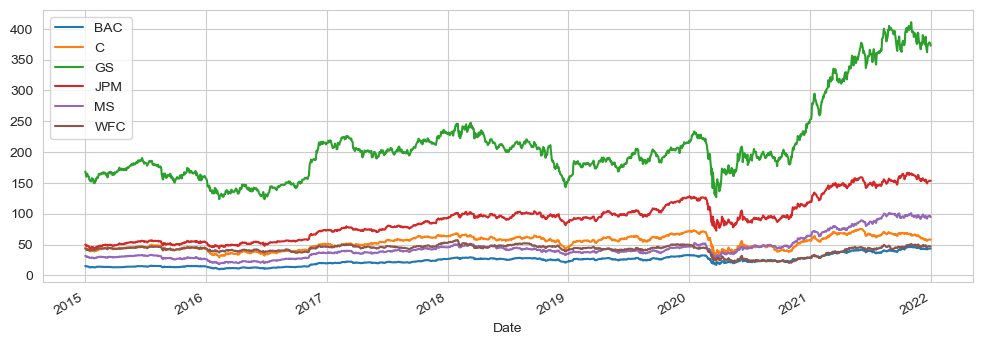

In [71]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

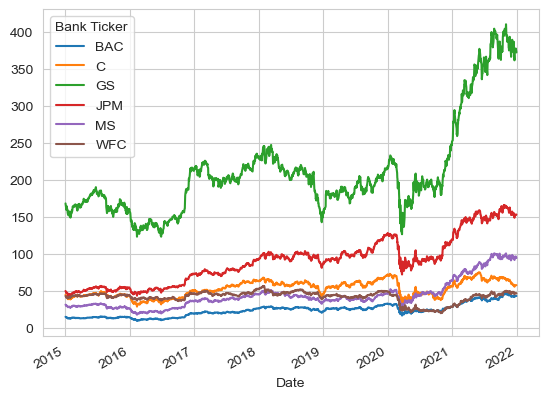

In [72]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [73]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

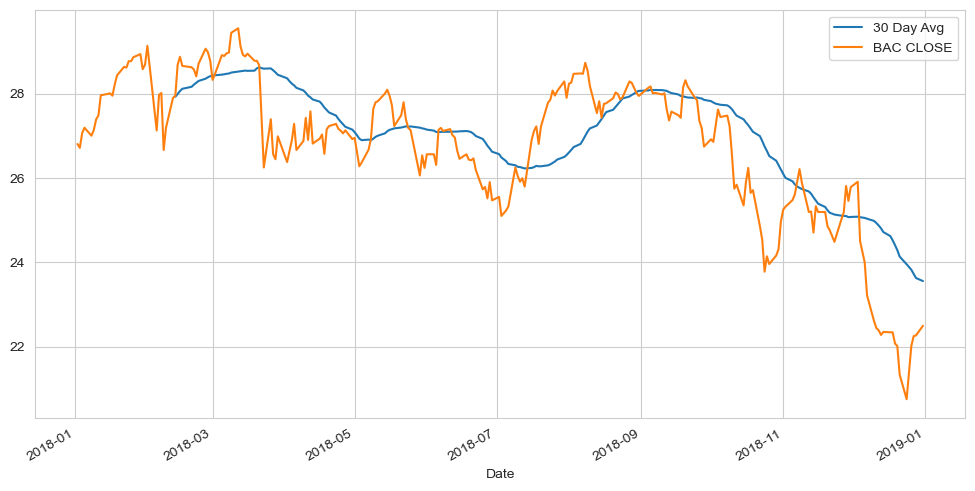

In [74]:
plt.figure(figsize=(12,6))
BAC['Close'].sort_index().loc['2018-01-01':'2019-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].sort_index().loc['2018-01-01':'2019-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

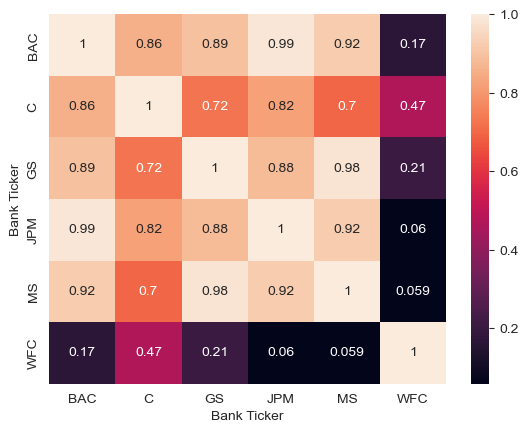

In [75]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

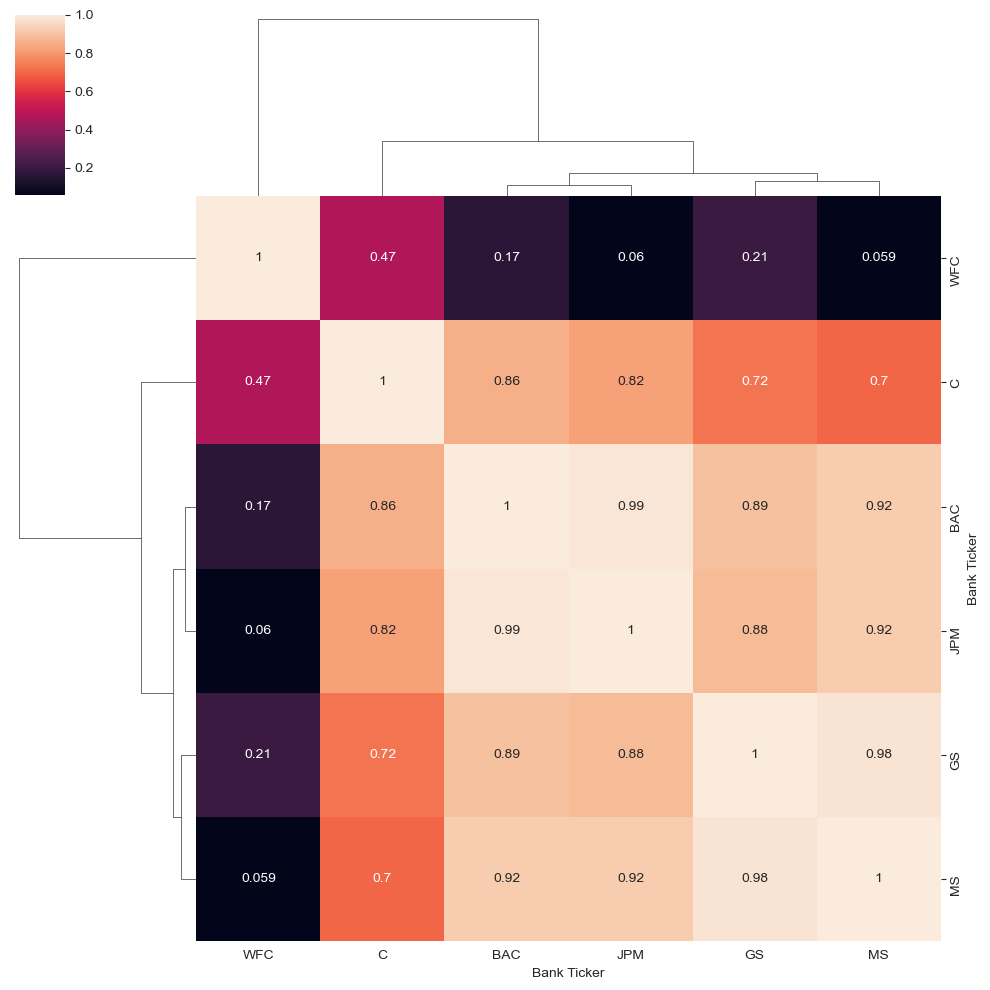

In [76]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [77]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [79]:
BAC[['Open', 'High', 'Low', 'Close']].sort_index().loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

In [81]:
MS['Close'].sort_index().loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [83]:
BAC['Close'].sort_index().loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')